In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import arviz as az
az.style.use("arviz-darkgrid")

# Data consolidation

In [2]:
csv_results = [f"../results/{file}" for file in os.listdir("../results") if file[-3:] == "csv"]

In [3]:
results = []

for i, file in enumerate(csv_results):
    temp_df = pd.read_csv(file, index_col = 0)

    if i == 0:
        continue

    results.append(temp_df)

In [6]:
results[1].iloc[27:, 0] += 3

In [9]:
results[0].columns

Index(['Problem #', 'Language', 'Model Exe Time', 'KS Distance - All',
       'KS Score - All', 'KS Exe Time - All', 'KS Distance - SS',
       'KS Score - SS', 'KS Exe Time - SS', 'KL Divergence', 'KL Exe Time'],
      dtype='object')

In [10]:
results[1].columns

Index(['Problem #', 'Language', 'Model Exe Time', 'KS Distance - All',
       'KS Score - All', 'KS Exe Time - All', 'KS Distance - SS',
       'KS Score - SS', 'KS Exe Time - SS', 'KL Divergence', 'KL Exe Time'],
      dtype='object')

In [13]:
results = pd.concat(results).sort_values(by = "Problem #", ascending =True)

In [34]:
results.to_csv("results-clean.csv")
results.to_latex("results.clean.tex")

# Execution time

In [7]:
results = pd.read_csv("results-clean.csv", index_col = 0)

In [17]:
dimensionality = [1] * 12 * 3 + [2] * 3 * 3 + [5] * 3 + [7] * 3 + [10] * 3

results["dims"] = dimensionality

In [40]:
x = results.groupby("dims")[["KS Exe Time - All", "KS Exe Time - SS", "KL Exe Time"]].mean()
x

,KS Exe Time - All,KS Exe Time - SS,KL Exe Time
dims,,,
1,0.662581,0.574805,0.001378
2,1.019588,0.882887,0.001154
5,15.122066,8.900412,0.002867
7,123.454891,37.557947,0.005309
10,4606.975985,657.862136,0.011138


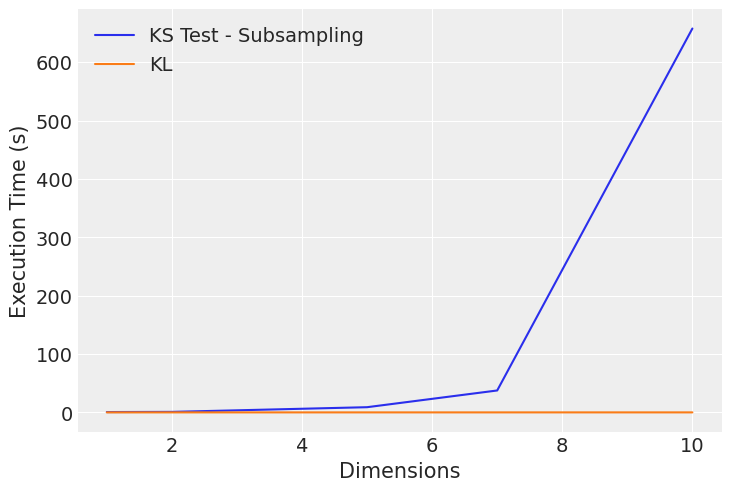

In [38]:
x = results.groupby("dims")[["KS Exe Time - All", "KS Exe Time - SS", "KL Exe Time"]].mean().reset_index().dims
# y1 = results.groupby("dims")[["KS Exe Time - All", "KS Exe Time - SS", "KL Exe Time"]].mean().reset_index()["KS Exe Time - All"]
y2 = results.groupby("dims")[["KS Exe Time - All", "KS Exe Time - SS", "KL Exe Time"]].mean().reset_index()["KS Exe Time - SS"]
y3 = results.groupby("dims")[["KS Exe Time - All", "KS Exe Time - SS", "KL Exe Time"]].mean().reset_index()["KL Exe Time"]

#plt.plot(x, y1, label = "KS Test - All test points")
plt.plot(x, y2, label = "KS Test - Subsampling")
plt.plot(x, y3, label = "KL")

plt.xlabel("Dimensions")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.show();

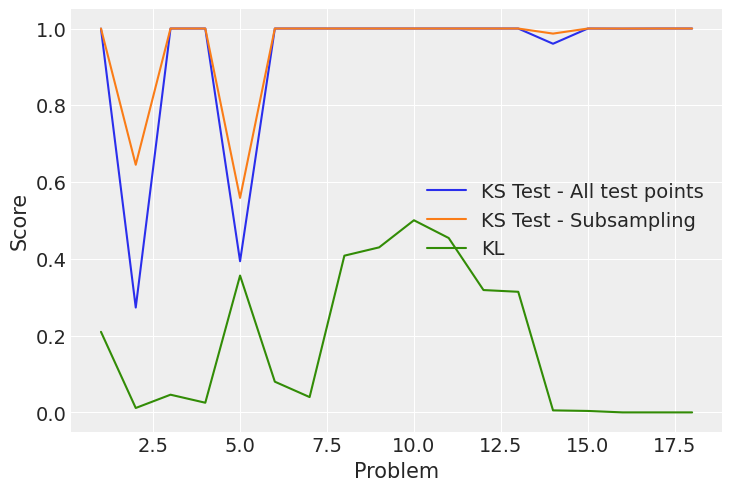

In [41]:
x = results.groupby("Problem #")[["KS Score - All", "KS Score - SS", "KL Divergence"]].mean().reset_index()["Problem #"]
y1 = results.groupby("Problem #")[["KS Score - All", "KS Score - SS", "KL Divergence"]].mean().reset_index()["KS Score - All"]
y2 = results.groupby("Problem #")[["KS Score - All", "KS Score - SS", "KL Divergence"]].mean().reset_index()["KS Score - SS"]
y3 = results.groupby("Problem #")[["KS Score - All", "KS Score - SS", "KL Divergence"]].mean().reset_index()["KL Divergence"]

plt.plot(x, y1, label = "KS Test - All test points")
plt.plot(x, y2, label = "KS Test - Subsampling")
plt.plot(x, y3, label = "KL")

plt.xlabel("Problem")
plt.ylabel("Score")
plt.legend()
plt.show();

# PPL comparison

In [37]:
results.groupby("Language")[["KS Score - All", "KS Score - SS", "KL Divergence"]].agg(["mean", "min", "max"])

KS Score - All                KS Score - SS                 \
                     mean       min  max          mean       min  max   
Language                                                                
pymc_model       0.923741  0.272967  1.0      0.971492  0.726836  1.0   
pyro_model       0.923661  0.273099  1.0      0.952937  0.392720  1.0   
stan_model       0.923735  0.273471  1.0      0.940662  0.415098  1.0   

           KL Divergence                          
                    mean           min       max  
Language                                          
pymc_model      0.176850  8.692208e-15  0.497379  
pyro_model      0.179179  8.803230e-15  0.500193  
stan_model      0.177933  8.839637e-15  0.504001

In [8]:
results

,Problem #,Language,Model Exe Time,KS Distance - All,KS Score - All,KS Exe Time - All,KS Distance - SS,KS Score - SS,KS Exe Time - SS,KL Divergence,KL Exe Time,dims
0,1,pymc_model,3.128168,0.129739,0.999981,0.598139,0.116426,1.000000,0.500038,2.068185e-01,0.001335,1
1,1,pyro_model,1.259453,0.129739,0.999981,0.603333,0.115052,1.000000,0.713939,2.073800e-01,0.001481,1
2,1,stan_model,0.292038,0.133164,0.999395,0.638477,0.133164,1.000000,0.531934,2.153608e-01,0.001083,1
4,2,pyro_model,3.179868,0.214716,0.273099,2.026392,0.214716,0.760154,1.670322,1.149693e-02,0.001674,1
3,2,pymc_model,2.038154,0.215838,0.272967,1.897116,0.198538,0.760012,1.652585,1.154570e-02,0.001220,1
5,2,stan_model,0.256628,0.214128,0.273471,2.103867,0.205597,0.415098,1.816408,1.138567e-02,0.001529,1
8,3,stan_model,0.975837,0.085588,1.000000,0.432647,0.053809,1.000000,0.379360,4.546044e-02,0.000846,1
7,3,pyro_model,3.054310,0.086399,1.000000,0.461502,0.071798,1.000000,0.333269,4.616392e-02,0.000886,1
6,3,pymc_model,1.145447,0.086399,1.000000,0.444708,0.078562,1.000000,0.389296,4.661702e-02,0.001207,1
11,4,stan_model,0.138557,0.107256,1.000000,0.515917,0.093579,1.000000,0.459726,2.776844e-02,0.000903,1


In [9]:
prior_results = pd.read_csv("../results/results_2024-08-14 12:50:01.062425.csv", index_col = 0)

In [15]:
N = [10]*3 + [50]*3 + [100] * 3
N *= 3

prior_results["N"] = N

priors = [1] * 9 + [0.5] * 9 + [0.1] * 9

prior_results["priors"] = priors

<Axes: xlabel='priors', ylabel='KS Distance - All'>

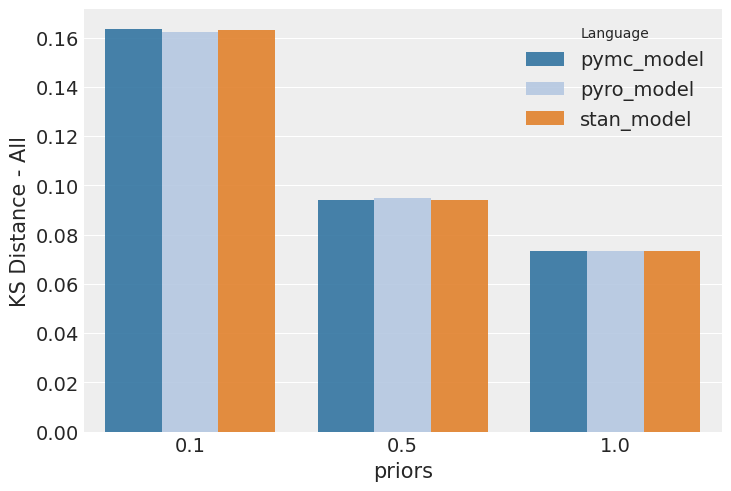

In [29]:
import seaborn as sns

temp = prior_results[prior_results["N"] == 10].copy()

sns.barplot(data = temp, x = "priors", y = "KS Distance - All", hue = "Language", alpha = 0.9, palette = "tab20")

<Axes: xlabel='N', ylabel='KS Distance - All'>

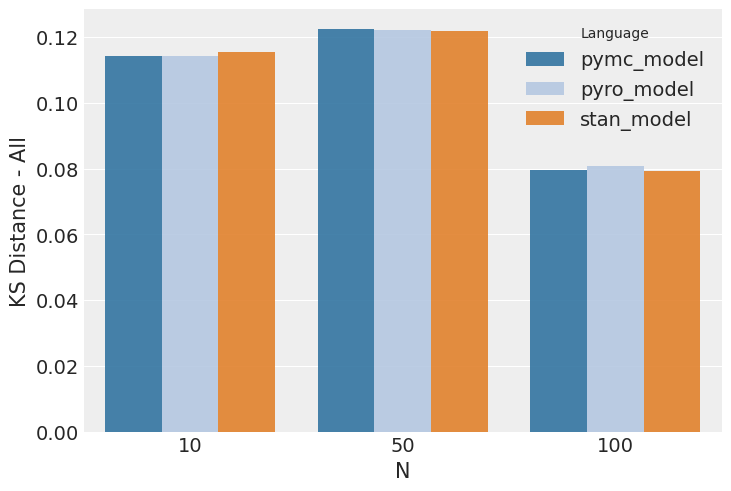

In [98]:
temp = results.copy()
N = (([10] * 3 + [50] * 3 + [100] * 3) * 4) + ([50] *6)*3
temp["N"] = N

temp = temp.groupby(["N", "Language"])[["KS Distance - All", "KS Score - All", "KS Distance - SS", "KS Score - SS", "KL Divergence"]].mean()

sns.barplot(data = temp, x = "N", y = "KS Distance - All", hue = "Language", alpha = 0.9, palette = "tab20")
#sns.barplot(data = temp, x = "N", y = "KS Distance - SS", hue = "Language", alpha = 0.9, palette = "tab20", ax = ax[1])
#sns.barplot(data = temp, x = "N", y = "KL Divergence", hue = "Language", alpha = 0.9, palette = "tab20", ax = ax[2])

<Axes: xlabel='N', ylabel='KS Distance - SS'>

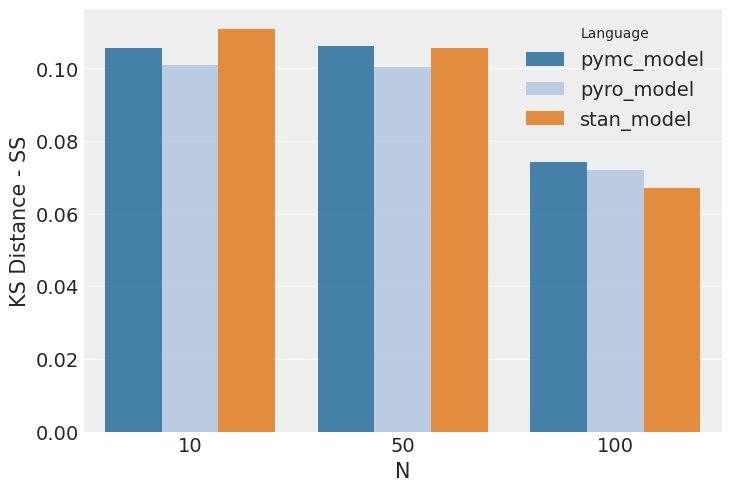

In [94]:
temp = results.copy()
N = (([10] * 3 + [50] * 3 + [100] * 3) * 4) + ([50] *6)*3
temp["N"] = N

temp = temp.groupby(["N", "Language"])[["KS Distance - All", "KS Score - All", "KS Distance - SS", "KS Score - SS", "KL Divergence"]].mean()

#sns.barplot(data = temp, x = "N", y = "KS Distance - All", hue = "Language", alpha = 0.9, palette = "tab20")
sns.barplot(data = temp, x = "N", y = "KS Distance - SS", hue = "Language", alpha = 0.9, palette = "tab20")
#sns.barplot(data = temp, x = "N", y = "KL Divergence", hue = "Language", alpha = 0.9, palette = "tab20")

<Axes: xlabel='N', ylabel='KL Divergence'>

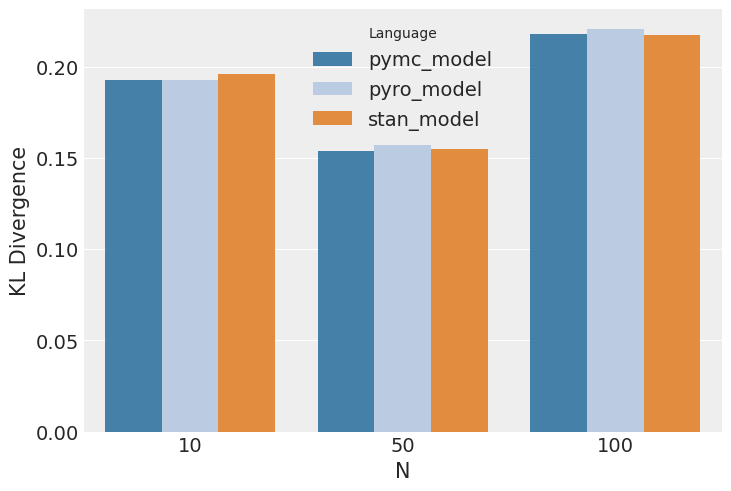

In [100]:
temp = results.copy()
N = (([10] * 3 + [50] * 3 + [100] * 3) * 4) + ([50] *6)*3
temp["N"] = N

temp = temp.groupby(["N", "Language"])[["KS Distance - All", "KS Score - All", "KS Distance - SS", "KS Score - SS", "KL Divergence"]].mean()

# sns.barplot(data = temp, x = "N", y = "KS Distance - All", hue = "Language", alpha = 0.9, palette = "tab20", ax = ax[0])
# sns.barplot(data = temp, x = "N", y = "KS Distance - SS", hue = "Language", alpha = 0.9, palette = "tab20", ax = ax[1])
sns.barplot(data = temp, x = "N", y = "KL Divergence", hue = "Language", alpha = 0.9, palette = "tab20")

<Axes: xlabel='N', ylabel='KL Divergence'>

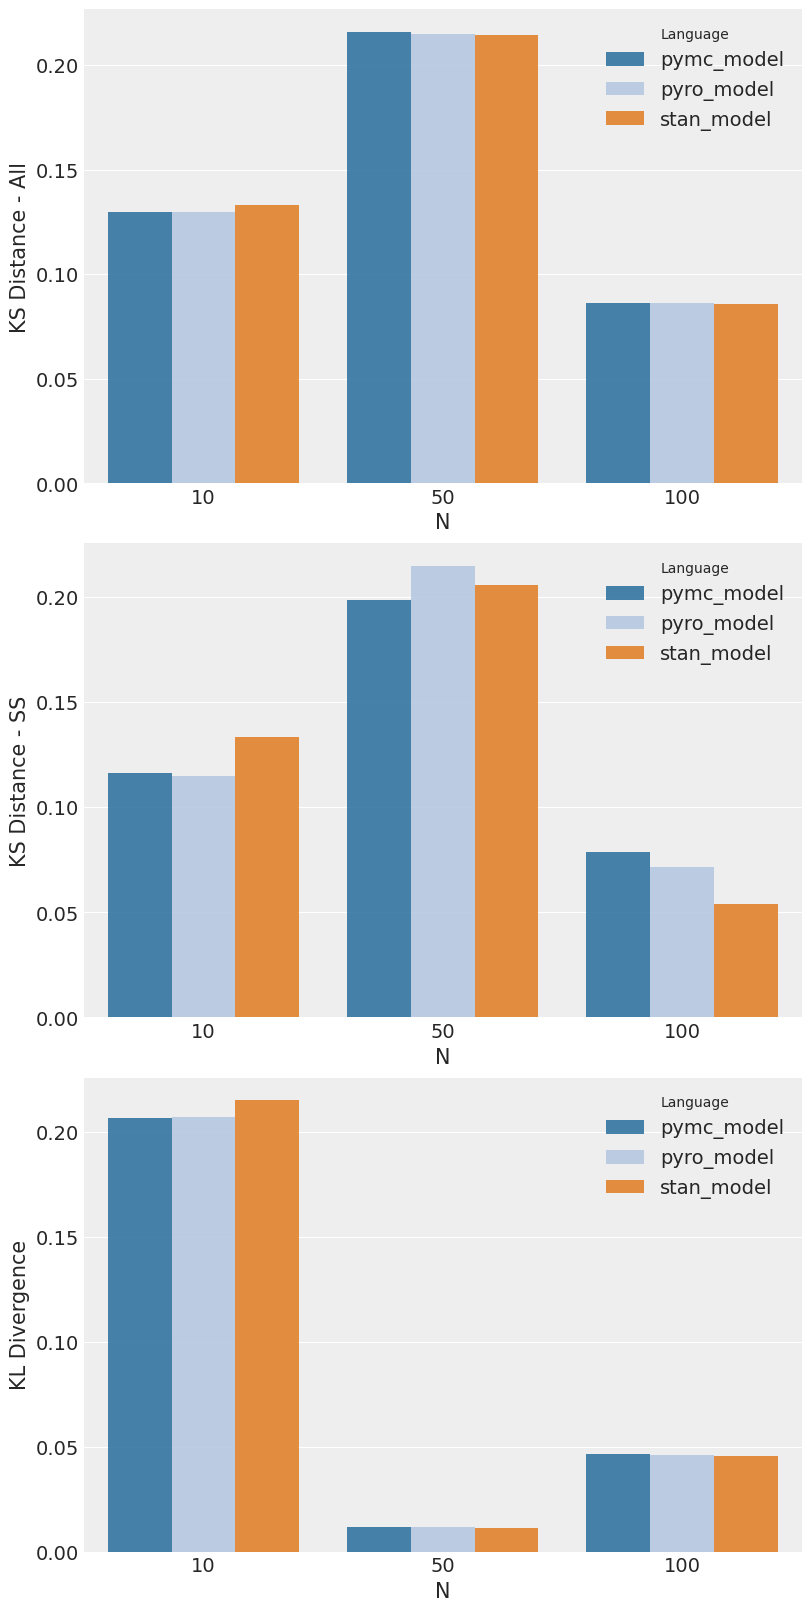

In [90]:
temp = results[results["Problem #"].isin([1, 2, 3])].copy()
temp["N"] = [10] * 3 + [50] * 3 + [100] * 3


fig, ax = plt.subplots(nrows = 3, figsize = (8, 16))

sns.barplot(data = temp, x = "N", y = "KS Distance - All", hue = "Language", alpha = 0.9, palette = "tab20", ax = ax[0])
sns.barplot(data = temp, x = "N", y = "KS Distance - SS", hue = "Language", alpha = 0.9, palette = "tab20", ax = ax[1])
sns.barplot(data = temp, x = "N", y = "KL Divergence", hue = "Language", alpha = 0.9, palette = "tab20", ax = ax[2])